# Full Pipeline Practice (Covid-19 Hospital los)

## Imports

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc, ConfusionMatrixDisplay 
import sys, os
%matplotlib inline 

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Reading dataset

In [130]:
df = pd.read_csv('host_los.csv')
df = df.head(30000) # Do this to eplore over data faster.
df

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,0
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,0
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,0
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,12,0,9,1,3,gynecology,Q,B,3.0,29424,8.0,Trauma,Extreme,3,41-50,6039.0,0
29996,29997,10,4,1,0,2,gynecology,Q,E,4.0,29424,8.0,Trauma,Extreme,4,41-50,7042.0,0
29997,29998,23,0,6,0,4,TB & Chest disease,Q,F,1.0,29424,8.0,Trauma,Extreme,4,41-50,5573.0,0
29998,29999,11,1,2,1,3,gynecology,Q,D,4.0,24299,2.0,Trauma,Moderate,2,51-60,5539.0,0


## EDA

In [131]:
df.describe()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Patient_Visitors,Admission_Deposit,Stay_Days
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29994.000000,30000.000000,29729.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,18.799933,1.313233,4.790333,0.785233,3.101300,2.650363,65602.843900,6.998015,3.236467,4977.433700,0.022133
std,8660.398374,8.619361,1.561025,3.153871,0.741391,1.137811,0.859720,37872.131267,4.270840,1.743727,1050.575072,0.147120
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,70.000000,1.000000,0.000000,1820.000000,0.000000
25%,7500.750000,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,32562.000000,4.000000,2.000000,4307.000000,0.000000
50%,15000.500000,21.000000,1.000000,5.000000,1.000000,3.000000,3.000000,64969.000000,8.000000,3.000000,4851.000000,0.000000
75%,22500.250000,26.000000,2.000000,7.000000,1.000000,4.000000,3.000000,97933.000000,8.000000,4.000000,5494.000000,0.000000
max,30000.000000,32.000000,6.000000,13.000000,2.000000,12.000000,4.000000,131595.000000,37.000000,24.000000,10999.000000,1.000000


In [132]:
df.shape

(30000, 18)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            30000 non-null  int64  
 1   Hospital                           30000 non-null  int64  
 2   Hospital_type                      30000 non-null  int64  
 3   Hospital_city                      30000 non-null  int64  
 4   Hospital_region                    30000 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  30000 non-null  int64  
 6   Department                         30000 non-null  object 
 7   Ward_Type                          30000 non-null  object 
 8   Ward_Facility                      30000 non-null  object 
 9   Bed_Grade                          29994 non-null  float64
 10  patientid                          30000 non-null  int64  
 11  City_Code_Patient                  29729 non-null  flo

<AxesSubplot:xlabel='Stay_Days', ylabel='count'>

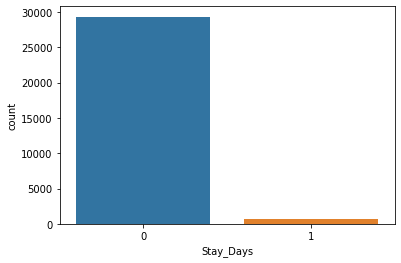

In [134]:
sns.countplot(df.Stay_Days)

## Data Cleaning

In [135]:
df['City_Code_Patient'] = df['City_Code_Patient'].astype(float)
df = df.drop(['case_id'], axis=1) # this feature Has no effect on data
df

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,0
2,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,0
3,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,0
4,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,12,0,9,1,3,gynecology,Q,B,3.0,29424,8.0,Trauma,Extreme,3,41-50,6039.0,0
29996,10,4,1,0,2,gynecology,Q,E,4.0,29424,8.0,Trauma,Extreme,4,41-50,7042.0,0
29997,23,0,6,0,4,TB & Chest disease,Q,F,1.0,29424,8.0,Trauma,Extreme,4,41-50,5573.0,0
29998,11,1,2,1,3,gynecology,Q,D,4.0,24299,2.0,Trauma,Moderate,2,51-60,5539.0,0


### Triynig To Find The Class Weight

In [72]:
y = df['Stay_Days']
print(f'Target value counts:\n{y.value_counts()}\n')
print(f'The ratio of 0 to 1:\n{y.value_counts()/df.shape[0]}')

Target value counts:
0    29336
1      664
Name: Stay_Days, dtype: int64

The ratio of 0 to 1:
0    0.977867
1    0.022133
Name: Stay_Days, dtype: float64


In [73]:
w = {0:0.977867, 1:0.022133} 

## Numerical data distribution

#### For this part lets look at the distribution of all of the features by ploting them. To do so lets first list all the types of our data from our dataset and take only the numerical ones

In [82]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [95]:
df_numerical = df.select_dtypes(include = ['float64', 'int64'])
df_numerical.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Patient_Visitors,Admission_Deposit,Stay_Days
0,8,2,3,2,3,2.0,31397,7.0,2,4911.0,0
1,2,2,5,2,2,2.0,31397,7.0,2,5954.0,0
2,10,4,1,0,2,2.0,31397,7.0,2,4745.0,0
3,26,1,2,1,2,2.0,31397,7.0,2,7272.0,0
4,26,1,2,1,2,2.0,31397,7.0,2,5558.0,0


In [96]:
df_num = df_numerical.drop(['Hospital_type', 'Hospital_city', 'Hospital_region'], axis=1)
df_num

,Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Patient_Visitors,Admission_Deposit,Stay_Days
0,8,3,2.0,31397,7.0,2,4911.0,0
1,2,2,2.0,31397,7.0,2,5954.0,0
2,10,2,2.0,31397,7.0,2,4745.0,0
3,26,2,2.0,31397,7.0,2,7272.0,0
4,26,2,2.0,31397,7.0,2,5558.0,0
...,...,...,...,...,...,...,...,...
29995,12,3,3.0,29424,8.0,3,6039.0,0
29996,10,2,4.0,29424,8.0,4,7042.0,0
29997,23,4,1.0,29424,8.0,4,5573.0,0
29998,11,3,4.0,24299,2.0,2,5539.0,0


#### Now lets plot them all:

array([[<AxesSubplot:title={'center':'Hospital'}>,
        <AxesSubplot:title={'center':'Available_Extra_Rooms_in_Hospital'}>,
        <AxesSubplot:title={'center':'Bed_Grade'}>],
       [<AxesSubplot:title={'center':'patientid'}>,
        <AxesSubplot:title={'center':'City_Code_Patient'}>,
        <AxesSubplot:title={'center':'Patient_Visitors'}>],
       [<AxesSubplot:title={'center':'Admission_Deposit'}>,
        <AxesSubplot:title={'center':'Stay_Days'}>, <AxesSubplot:>]],
      dtype=object)

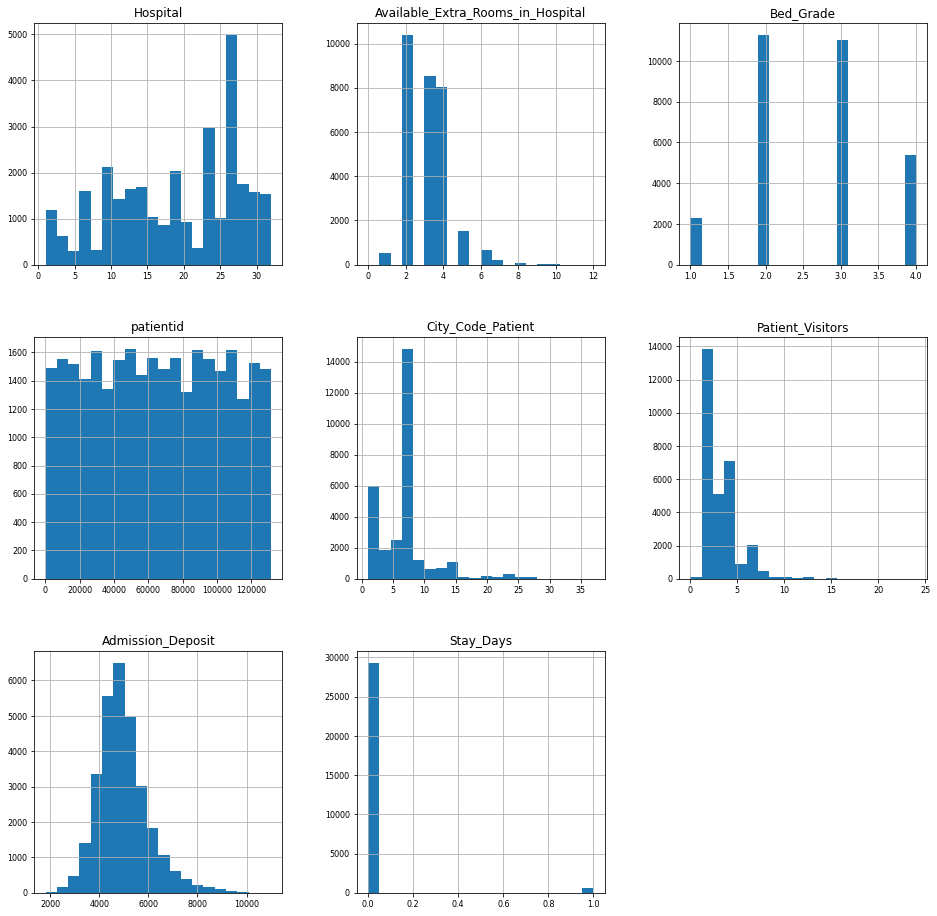

In [89]:
df_num.hist(figsize=(16, 16), bins=20, xlabelsize=8, ylabelsize=8)

#### Well! we can see some relations between features. Let's go deeper and check the corelations between features.

### Corelation plot

<AxesSubplot:>

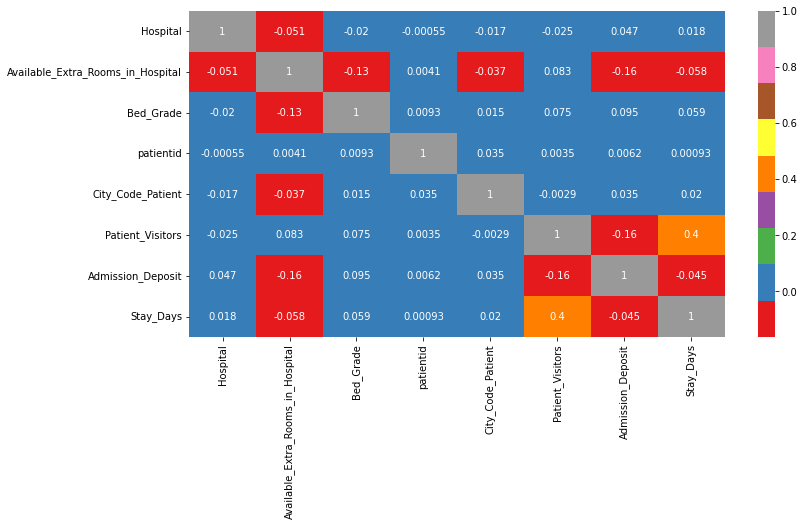

In [98]:
cor = df_num.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

#### That was just corelations between Numerical features. Now we can plot with the numeric features that are actully categorical! (Althogh we know that might show a not reliable relations result because of Catrgorical features!)

<AxesSubplot:>

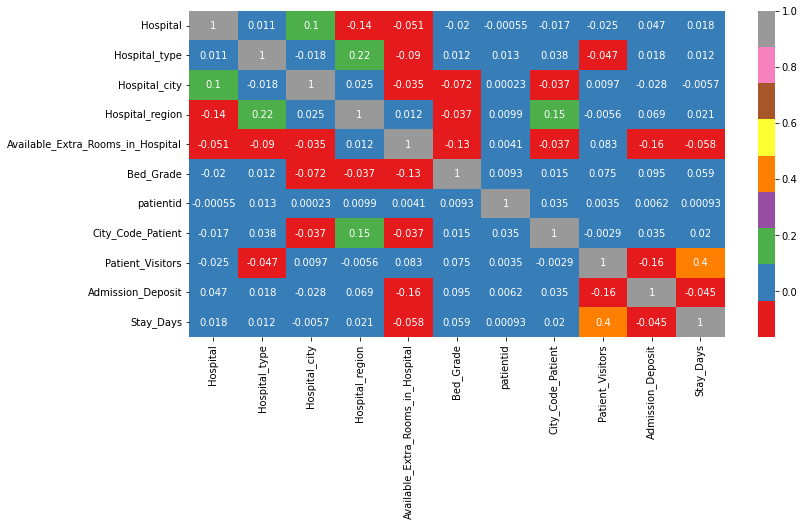

In [99]:
cor = df_numerical.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

#### We also have some other features that are obviously Categorical! Let's identify them and then Incode them

## Type Analysing

In [102]:
from sklearn.compose import make_column_selector as selector
categorical_columns_selector = selector(dtype_include= 'object') 
categorical_columns = categorical_columns_selector(df)
categorical_columns

['Department',
 'Ward_Type',
 'Ward_Facility',
 'Type of Admission',
 'Illness_Severity',
 'Age']

#### Here we will access the count of each categorical feature in barcharts

<AxesSubplot:xlabel='Illness_Severity', ylabel='count'>

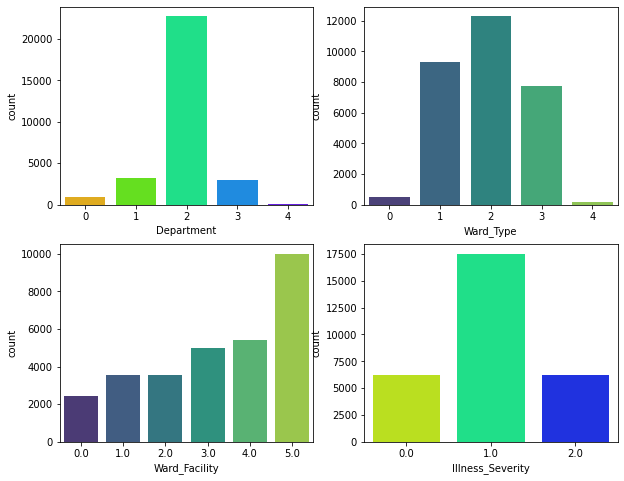

In [118]:
fig ,ax = plt.subplots(2,2,figsize=(10,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=df,x='Department',palette='gist_rainbow',ax=ax1)
sns.countplot(data=df,x='Ward_Type',palette='viridis',ax=ax2)
sns.countplot(data=df,x='Ward_Facility',palette='viridis',ax=ax3)
sns.countplot(data=df,x='Illness_Severity',palette='gist_rainbow',ax=ax4)

In [35]:
categoricals = ['Department',
 'Ward_Type',
 'Ward_Facility',
 'Type of Admission',
 'Illness_Severity',
 'Age']

for col in categoricals:
    print(col)
    print(df[col].unique())

Department
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
Ward_Type
['R' 'S' 'Q' 'P' 'T']
Ward_Facility
['F' 'E' 'D' 'B' 'A' 'C']
Type of Admission
['Emergency' 'Trauma' 'Urgent']
Illness_Severity
['Extreme' 'Moderate' 'Minor']
Age
['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100']


#### Using ordina encodin for ordinal

In [108]:
ordinal_list = ['Illness_Severity', 'Age', 'Ward_Facility']

Illness_Severity = ['Minor', 'Moderate', 'Extreme']
Age = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','91-100']
Ward_Facility = ['A', 'B', 'C', 'D', 'E', 'F']

encoder = OrdinalEncoder(categories=[Illness_Severity, Age, Ward_Facility])
ordinal_encoded = pd.DataFrame(encoder.fit_transform(df[ordinal_list]), columns=(ordinal_list))

df = df.drop(['Illness_Severity', 'Age', 'Ward_Facility'], axis=1)

In [109]:
df = pd.concat([df, ordinal_encoded], axis=1)
target_column = df.pop('Stay_Days')
df['Stay_Days'] = target_column
df

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Patient_Visitors,Admission_Deposit,Illness_Severity,Age,Ward_Facility,Stay_Days
0,8,2,3,2,3,radiotherapy,R,2.0,31397,7.0,Emergency,2,4911.0,2.0,5.0,5.0,0
1,2,2,5,2,2,radiotherapy,S,2.0,31397,7.0,Trauma,2,5954.0,2.0,5.0,5.0,0
2,10,4,1,0,2,anesthesia,S,2.0,31397,7.0,Trauma,2,4745.0,2.0,5.0,4.0,0
3,26,1,2,1,2,radiotherapy,R,2.0,31397,7.0,Trauma,2,7272.0,2.0,5.0,3.0,0
4,26,1,2,1,2,radiotherapy,S,2.0,31397,7.0,Trauma,2,5558.0,2.0,5.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,12,0,9,1,3,gynecology,Q,3.0,29424,8.0,Trauma,3,6039.0,2.0,4.0,1.0,0
29996,10,4,1,0,2,gynecology,Q,4.0,29424,8.0,Trauma,4,7042.0,2.0,4.0,4.0,0
29997,23,0,6,0,4,TB & Chest disease,Q,1.0,29424,8.0,Trauma,4,5573.0,2.0,4.0,5.0,0
29998,11,1,2,1,3,gynecology,Q,4.0,24299,2.0,Trauma,2,5539.0,1.0,5.0,3.0,0


#### Before diving into numeric features, let's check if there is nan value in the dataset or not.

In [111]:
df.isna().sum()

Hospital                               0
Hospital_type                          0
Hospital_city                          0
Hospital_region                        0
Available_Extra_Rooms_in_Hospital      0
Department                             0
Ward_Type                              0
Bed_Grade                              6
patientid                              0
City_Code_Patient                    271
Type of Admission                      0
Patient_Visitors                       0
Admission_Deposit                      0
Illness_Severity                       0
Age                                    0
Ward_Facility                          0
Stay_Days                              0
dtype: int64

#### Well as it is shown, we have two columns with nan values. Imputing them before incoding is needed.

In [113]:
# impute with simple imputer and 'median', because they are categorical
data =  df[['Bed_Grade', 'City_Code_Patient']] 
imp = SimpleImputer(strategy='median') 
my_array = imp.fit_transform(data)
data = pd.DataFrame(my_array, columns = [col for col in data])
df['Bed_Grade'] , df['City_Code_Patient'] = data['Bed_Grade'], data['City_Code_Patient']

df.isna().sum()

<IPython.core.display.Javascript object>

Hospital                             0
Hospital_type                        0
Hospital_city                        0
Hospital_region                      0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Patient_Visitors                     0
Admission_Deposit                    0
Illness_Severity                     0
Age                                  0
Ward_Facility                        0
Stay_Days                            0
dtype: int64

#### Now it's ok. Here label encoding is ready to be used for those numerical categories. 

In [115]:
nominal_categories = ["Department", "Type of Admission", "Ward_Type"]

for c in nominal_categories:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c].astype(str))
    
df

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Patient_Visitors,Admission_Deposit,Illness_Severity,Age,Ward_Facility,Stay_Days
0,8,2,3,2,3,3,2,2.0,31397,7.0,0,2,4911.0,2.0,5.0,5.0,0
1,2,2,5,2,2,3,3,2.0,31397,7.0,1,2,5954.0,2.0,5.0,5.0,0
2,10,4,1,0,2,1,3,2.0,31397,7.0,1,2,4745.0,2.0,5.0,4.0,0
3,26,1,2,1,2,3,2,2.0,31397,7.0,1,2,7272.0,2.0,5.0,3.0,0
4,26,1,2,1,2,3,3,2.0,31397,7.0,1,2,5558.0,2.0,5.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,12,0,9,1,3,2,1,3.0,29424,8.0,1,3,6039.0,2.0,4.0,1.0,0
29996,10,4,1,0,2,2,1,4.0,29424,8.0,1,4,7042.0,2.0,4.0,4.0,0
29997,23,0,6,0,4,0,1,1.0,29424,8.0,1,4,5573.0,2.0,4.0,5.0,0
29998,11,1,2,1,3,2,1,4.0,24299,2.0,1,2,5539.0,1.0,5.0,3.0,0


## Model Training

In [119]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
train, test, target, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
#x_train #x_test #y_train

#### Here I'm gonna use Logestic Regression model. A cross Validation (StratifiedKFold) will check the roc_auc_score and also I check Logloss for each Fold, and all of these are checked on 5 algorithms and the Max score will be the final output here. The algorithms that I will test are : 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

algorithm_score = []
score_Lr = [] 

oof_Lr = np.zeros(len(train)) 
pred_Lr = np.zeros(len(test)) 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    for fold_ , (train_ind, val_ind) in enumerate(folds.split(train, target)): 
        print('fold:', fold_,' - Starting ...') 
        trn_data, val_data = train.iloc[train_ind], train.iloc[val_ind] 
        y_train, y_val = target.iloc[train_ind], target.iloc[val_ind] 

        Lr = LogisticRegression(max_iter=4000, solver= algo, random_state=42) 
        Lr.fit(trn_data, y_train) 
        oof_Lr[val_ind] = Lr.predict_proba(val_data)[:, 1] 
        print('fold auc', roc_auc_score(y_val, oof_Lr[val_ind])) 
        score_Lr.append(roc_auc_score(y_val, oof_Lr[val_ind])) 
        pred_Lr += Lr.predict_proba(test)[:, 1]/folds.n_splits 

        score = log_loss(y_val, oof_Lr[val_ind])
        print(f'Logloss:{score}\n')
        

    print(f'Lr Model auc with {algo}:  ...>, {np.mean(score_Lr)}')
    
    np.save('oof_lr', oof_Lr) 
    np.save('pred_lr', pred_Lr) 
    
    algorithm_score.append(f'Max score of all algorithms = {np.mean(score_Lr)}')
    
print(max(algorithm_score))



<IPython.core.display.Javascript object>

fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9412692210539609
Logloss:0.05795159636153445

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9130355846042121
Logloss:0.06698591818958377

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.907008777746203
Logloss:0.06829577051508252

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.8986040068201192
Logloss:0.07216834049484457

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9378880894314509
Logloss:0.062225436975246684

Lr Model auc with newton-cg:  ...>, 0.9195611359311892
fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.8830594234473177
Logloss:0.07176138740239742

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.8132972593224085
Logloss:0.08337931645684564

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.8368282498184458
Logloss:0.08453060719813127

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.8647086451327712
Logloss:0.07780008333586967

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.8866461054644948
Logloss:0.07227762597724703

Lr Model auc with lbfgs:  ...>, 0.8882345362841384
fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.887854819866755
Logloss:0.07183179112359975

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.8524083546462062
Logloss:0.07704676574813497

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.8696658615136876
Logloss:0.07522151544844927

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.8698099207476873
Logloss:0.07729795714225872

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.84280067824587
Logloss:0.080883015322563

Lr Model auc with liblinear:  ...>, 0.8803256665241062
fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.6803700546241039
Logloss:0.10355073469289938

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.6078312967699157
Logloss:0.1076381092099219

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5882648953301127
Logloss:0.10848454360818645

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.6025760948501785
Logloss:0.10854811862301211

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.578462760038254
Logloss:0.11038083174882149

Lr Model auc with sag:  ...>, 0.8131195049737079
fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.6791425910138612
Logloss:0.10363909311979137

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.606714344352878
Logloss:0.10771557908255697

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5870788734173218
Logloss:0.1085614757903455

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.6013071895424837
Logloss:0.10861814107521522

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.576964673716408
Logloss:0.11047061662826443

Lr Model auc with saga:  ...>, 0.7725439108606842
Max score of all algorithms = 0.9195611359311892


In [51]:
print('Confusion matrix\n',confusion_matrix(y_val,Lr.predict(val_data)))

Confusion matrix
 [[4691    0]
 [ 109    0]]


#### Confusion Matrix is a table that is used in classification problems to assess where errors in the model were made. The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.

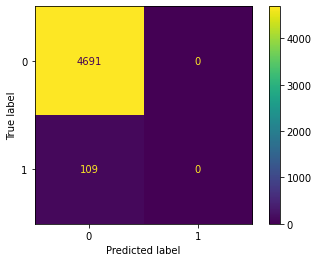

accuracy = 0.9772916666666667,
recall = 0.0,
precision = nan,
f1-score = nan


In [52]:
predictions = Lr.predict(val_data)

#  confusion matrix
cm = confusion_matrix(y_val, predictions, labels=[0, 1])
cm_displ = ConfusionMatrixDisplay(cm)
cm_displ.plot()
plt.show()

#  calculate accuracy:
accuracy = np.mean(predictions==y_val)
recall = cm[1, 1]/cm[1, :].sum() # of the total actual positives, how much were classified correctly
precision = cm[1, 1]/cm[:, 1].sum() # of all predicted positives, how much were True positives
f1 = 2 * ((recall * precision)/(recall + precision)) 
print(f"accuracy = {accuracy},\nrecall = {recall},\nprecision = {precision},\nf1-score = {f1}")

#### Here is like just the part before, but with one difference. It is the Class Weight!

In [123]:
algorithm_score = []
score_Lr = [] 

oof_Lr = np.zeros(len(train)) 
pred_Lr = np.zeros(len(test)) 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    for fold_ , (train_ind, val_ind) in enumerate(folds.split(train, target)): 
        print('fold:', fold_,' - Starting ...') 
        trn_data, val_data = train.iloc[train_ind], train.iloc[val_ind] 
        y_train, y_val = target.iloc[train_ind], target.iloc[val_ind] 

        lr_model_weighted = LogisticRegression(max_iter=4000, solver= algo, random_state=42, class_weight=w) 
        lr_model_weighted.fit(trn_data, y_train) 
        oof_Lr[val_ind] = lr_model_weighted.predict_proba(val_data)[:, 1] 
        print('fold auc', roc_auc_score(y_val, oof_Lr[val_ind])) 
        score_Lr.append(roc_auc_score(y_val, oof_Lr[val_ind])) 
        pred_Lr += lr_model_weighted.predict_proba(test)[:, 1]/folds.n_splits
        
        score = log_loss(y_val, oof_Lr[val_ind])
        print(f'Logloss:{score}\n')
        

    print(f'Lr Model auc with {algo}:  ...>, {np.mean(score_Lr)} \n')
    
    np.save('oof_lr', oof_Lr) 
    np.save('pred_lr', pred_Lr) 
    
    algorithm_score.append(f'Max score of all algorithms = {np.mean(score_Lr)}')
    
print(max(algorithm_score))

<IPython.core.display.Javascript object>

fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9407324524012504
Logloss:0.11700538674523228

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9130020365634176
Logloss:0.12509705932253476

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.8998748855419785
Logloss:0.12743731582989776

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.8969581794070285
Logloss:0.13074777324058984

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9356761630215189
Logloss:0.11868165191256741

Lr Model auc with newton-cg:  ...>, 0.9172487433870387 

fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.6747201698714914
Logloss:0.1686745968328875

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.7357776041173313
Logloss:0.15440111782613472

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5847088030059044
Logloss:0.18142050260015238

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.7546000284171639
Logloss:0.15196282680683665

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.7882085351805821
Logloss:0.1490815633539656

Lr Model auc with lbfgs:  ...>, 0.8124258857527666 

fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.6747221432856556
Logloss:0.1686653240311114

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5945995547977645
Logloss:0.17893766568636543

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5847324839758771
Logloss:0.18142351264296583

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5984260048624925
Logloss:0.18078404816357546

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5787189601794575
Logloss:0.184136352056374

Lr Model auc with liblinear:  ...>, 0.7436972003085942 

fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.674368902150232
Logloss:0.16830175715463985

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5942009251365603
Logloss:0.1786410963635762

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5835464620630861
Logloss:0.18114277310518684

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5978852893814532
Logloss:0.18040783703293034

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5781381094776451
Logloss:0.18375283428661107

Lr Model auc with sag:  ...>, 0.7091798846418946 

fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.673950538347384
Logloss:0.1679386746665889

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5936365286855483
Logloss:0.17833868282797918

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5823860945344321
Logloss:0.18087355794030338

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5971511793123045
Logloss:0.18003571221982403

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.5776139748376259
Logloss:0.1833804200646866

Lr Model auc with saga:  ...>, 0.6883334403422074 

Max score of all algorithms = 0.9172487433870387


In [54]:
print('Confusion matrix\n',confusion_matrix(y_val,lr_model_weighted.predict(val_data)))

Confusion matrix
 [[4691    0]
 [ 109    0]]


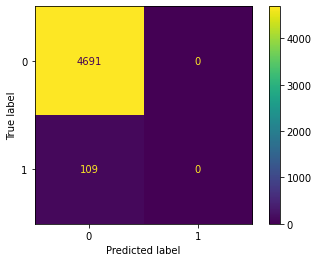

accuracy = 0.9772916666666667,
recall = 0.0,
precision = nan,
f1-score = nan


In [55]:
predictions = lr_model_weighted.predict(val_data)

#  confusion matrix
cm = confusion_matrix(y_val, predictions, labels=[0, 1])
cm_displ = ConfusionMatrixDisplay(cm)
cm_displ.plot()
plt.show()

#  calculate accuracy:
accuracy = np.mean(predictions==y_val)
recall = cm[1, 1]/cm[1, :].sum() # of the total actual positives, how much were classified correctly
precision = cm[1, 1]/cm[:, 1].sum() # of all predicted positives, how much were True positives
f1 = 2 * ((recall * precision)/(recall + precision)) 
print(f"accuracy = {accuracy},\nrecall = {recall},\nprecision = {precision},\nf1-score = {f1}")

Text(0.5, 0, 'False positive rate')

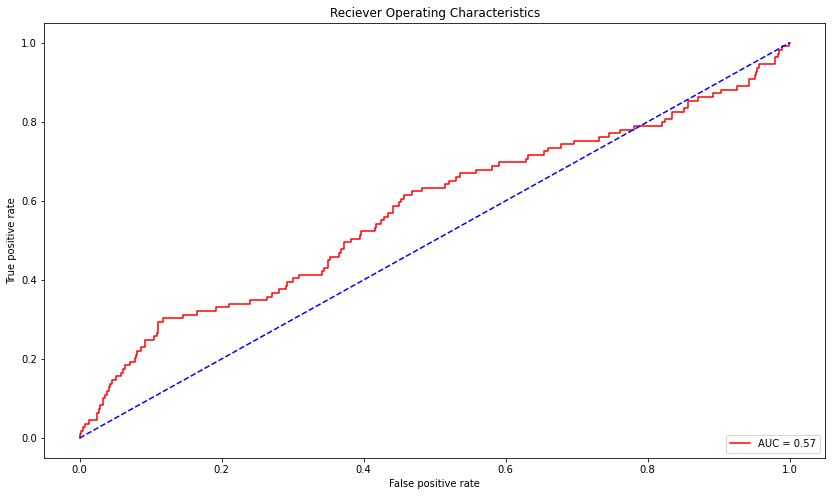

In [56]:
proba = lr_model_weighted.predict_proba(val_data)[:,1]
frp,trp, threshold = roc_curve(y_val,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

#### As can be seen, the results obtained from the previous two methods have given almost the same results in the existing dataset. It means that Max score of all algorithms with or without class weight parameter, has actully no difference here. And finally we have a good model according to the scores!